In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np
import sys
import astropy.units as u
from astropy.io import ascii, fits
from astropy.modeling.blackbody import blackbody_lambda

sys.path.insert(0, '../')
from libra import Spot, Star

In [3]:
phoenix = fits.getdata('../libra/data/phoenix/lte025.0-4.5-0.0a+0.0.BT-Settl.spec.fits')

kplr = ascii.read('../libra/data/filters/kepler_response_hires1.txt')
kplr_wavelength, kplr_trans = kplr['col1'], kplr['col2']

phoenix_wavelength = phoenix['Wavelength']*1000 * u.nm
phoenix_flux = phoenix['Flux'] / phoenix['Flux'].max()

cut_wavelengths = (phoenix_wavelength < 200*u.nm) | (phoenix_wavelength > 6000*u.nm)
phoenix_wavelength = phoenix_wavelength[~cut_wavelengths]
phoenix_flux = phoenix_flux[~cut_wavelengths]

kplr = ascii.read('../libra/data/filters/kepler_response_hires1.txt')

bb_2511 = blackbody_lambda(phoenix_wavelength, 2511)
bb_2500 = blackbody_lambda(phoenix_wavelength, 2500)

trappist1_flux = phoenix_flux * bb_2511.value / bb_2500.value

spitz_1 = ascii.read('../libra/data/filters/Spitzer_IRAC.I1.txt')
spitz1_wave = (spitz_1['col1'] * u.Angstrom).to(u.nm)
spitz1_trans = spitz_1['col2']

spitz_2 = ascii.read('../libra/data/filters/Spitzer_IRAC.I2.txt')
spitz2_wave = (spitz_2['col1'] * u.Angstrom).to(u.nm)
spitz2_trans = spitz_2['col2']

from libra import throughput

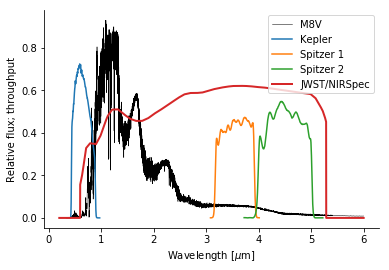

In [4]:
from scipy.ndimage import gaussian_filter1d

fig, ax = plt.subplots()
ax.plot(phoenix_wavelength/1000, gaussian_filter1d(trappist1_flux, 50), color='k', label='M8V', lw=0.5)
ax.plot(kplr_wavelength/1000, kplr_trans, label='Kepler')
ax.plot(spitz1_wave/1000, spitz1_trans, label='Spitzer 1')
ax.plot(spitz2_wave/1000, spitz2_trans, label='Spitzer 2')

ax.plot(phoenix_wavelength/1000, throughput(phoenix_wavelength/1000), label='JWST/NIRSpec', lw=2)
ax.legend()
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('Relative flux; throughput')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.xlim([200, 6000])
#fig.savefig('i_love_nirspec.pdf', bbox_inches='tight')

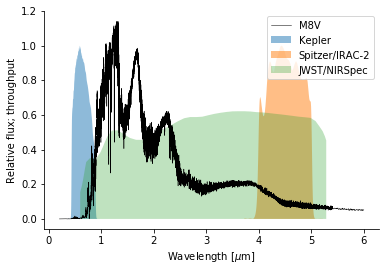

In [5]:
from scipy.ndimage import gaussian_filter1d

fig, ax = plt.subplots()
ax.plot(phoenix_wavelength/1000, phoenix_wavelength/1000 * gaussian_filter1d(trappist1_flux, 50), 
        color='k', label='M8V', lw=0.5)

ax.fill_between(kplr_wavelength/1000, 0, kplr_trans/kplr_trans.max(), label='Kepler', alpha=0.5)
#ax.fill_between(spitz1_wave/1000, 0, spitz1_trans, label='Spitzer 1', alpha=0.5)
ax.fill_between(spitz2_wave/1000, 0, spitz2_trans/spitz2_trans.max(), label='Spitzer/IRAC-2', alpha=0.5)
ax.fill_between(phoenix_wavelength/1000, throughput(phoenix_wavelength/1000), 
                label='JWST/NIRSpec', lw=2, alpha=0.3)
ax.legend()
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('Relative flux; throughput')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.xlim([200, 6000])
#fig.savefig('i_love_nirspec.pdf', bbox_inches='tight')
#fig.savefig('i_love_nirspec.png', bbox_inches='tight', dpi=250)

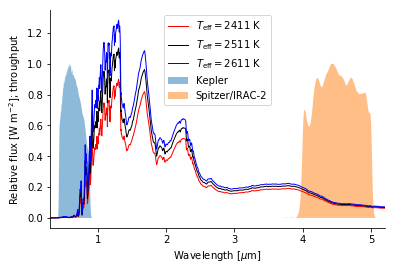

In [6]:
from scipy.ndimage import gaussian_filter1d

fig, ax = plt.subplots()

bb_2411 = blackbody_lambda(phoenix_wavelength, 2411)
bb_2611 = blackbody_lambda(phoenix_wavelength, 2611)

trappist1_flux = phoenix_flux * bb_2511.value / bb_2500.value

trappist1_flux_plus = phoenix_flux * bb_2611.value / bb_2511.value

trappist1_flux_minus = phoenix_flux * bb_2411.value / bb_2511.value

skip = 10

ax.plot(phoenix_wavelength[::skip]/1000, 
        phoenix_wavelength[::skip]/1000 * gaussian_filter1d(trappist1_flux_minus[::skip], 100), 
        color='r', label='$T_\mathrm{eff} = 2411$ K', lw=1)
ax.plot(phoenix_wavelength[::skip]/1000, 
        phoenix_wavelength[::skip]/1000 * gaussian_filter1d(trappist1_flux[::skip], 100), 
        color='k', label='$T_\mathrm{eff} = 2511$ K', lw=1)
ax.plot(phoenix_wavelength[::skip]/1000, 
        phoenix_wavelength[::skip]/1000 * gaussian_filter1d(trappist1_flux_plus[::skip], 100), 
        color='b', label='$T_\mathrm{eff} = 2611$ K', lw=1)

ax.fill_between(kplr_wavelength/1000, 0, kplr_trans/kplr_trans.max(), label='Kepler', alpha=0.5)
#ax.fill_between(spitz1_wave/1000, 0, spitz1_trans, label='Spitzer 1', alpha=0.5)
ax.fill_between(spitz2_wave/1000, 0, spitz2_trans/spitz2_trans.max(), label='Spitzer/IRAC-2', alpha=0.5)
# ax.fill_between(phoenix_wavelength/1000, throughput(phoenix_wavelength/1000), 
#                 label='JWST/NIRSpec', lw=2, alpha=0.3)
ax.legend(loc='upper center')
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel(r'Relative flux [W m$^{-2}$]; throughput')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([0.3, 5.2])
#ax.xlim([200, 6000])
fig.savefig('i_love_nirspec.pdf', bbox_inches='tight')
fig.savefig('i_love_nirspec.png', bbox_inches='tight', dpi=250)

In [7]:
# temperature_offsets = np.linspace(-500, 2000, 10)
# kepler_contrast_simple = []
# spitzer_contrast_simple = []
# for temp_offset in temperature_offsets:
#     kplr_trans_interp = np.interp(phoenix_wavelength, kplr_wavelength, kplr_trans, left=0, right=0)
#     photosphere_flux_kepler = np.trapz(trappist1_flux * phoenix_wavelength * kplr_trans_interp, phoenix_wavelength)
#     bb_trial = blackbody_lambda(phoenix_wavelength, 2559 + temp_offset).value
#     brightspot_flux = trappist1_flux * bb_trial / bb_2559.value 
#     brightspot_flux_kepler = np.trapz(brightspot_flux * phoenix_wavelength * kplr_trans_interp, phoenix_wavelength)

#     kepler_contrast_simple.append(brightspot_flux_kepler/photosphere_flux_kepler)

#     spitzer_trans_interp = np.interp(phoenix_wavelength, spitz2_wave, spitz2_trans, left=0, right=0)
#     photosphere_flux_spitzer = np.trapz(trappist1_flux * phoenix_wavelength * spitzer_trans_interp, phoenix_wavelength)
#     brightspot_flux_spitzer = np.trapz(brightspot_flux * phoenix_wavelength * spitzer_trans_interp, phoenix_wavelength)

#     spitzer_contrast_simple.append(brightspot_flux_spitzer / photosphere_flux_spitzer)

# # plt.plot(phoenix_wavelength, trappist1_flux)
# # plt.plot(phoenix_wavelength, brightspot_flux, ls='--')
# # # plt.plot(phoenix_wavelength, bb_trial)
# # # plt.plot(phoenix_wavelength, bb_2559)
# # plt.plot(kplr_wavelength, kplr_trans)
# # plt.plot(spitz1_wave, spitz1_trans)
# # plt.plot(spitz2_wave, spitz2_trans)

In [8]:
# temperature_offsets[np.argmin(np.abs(np.array(kepler_contrast) - 21))] + 2559

In [9]:
# plt.plot(kepler_contrast_simple, spitzer_contrast_simple)

In [10]:
# temperature_offsets = np.linspace(-500, 2000, 10)
# kepler_contrast = []
# spitzer_contrast = []
# trappist1_flux_bb = blackbody_lambda(phoenix_wavelength, 2559).value
# for temp_offset in temperature_offsets:
#     kplr_trans_interp = np.interp(phoenix_wavelength, kplr_wavelength, kplr_trans, left=0, right=0)
#     photosphere_flux_kepler = np.trapz(trappist1_flux_bb * phoenix_wavelength * kplr_trans_interp, phoenix_wavelength)
#     bb_trial = blackbody_lambda(phoenix_wavelength, 2559 + temp_offset).value
#     brightspot_flux = trappist1_flux_bb * bb_trial / bb_2559.value 
#     brightspot_flux_kepler = np.trapz(brightspot_flux * phoenix_wavelength * kplr_trans_interp, phoenix_wavelength)

#     kepler_contrast.append(brightspot_flux_kepler/photosphere_flux_kepler)

#     spitzer_trans_interp = np.interp(phoenix_wavelength, spitz2_wave, spitz2_trans, left=0, right=0)
#     photosphere_flux_spitzer = np.trapz(trappist1_flux_bb * phoenix_wavelength * spitzer_trans_interp, phoenix_wavelength)
#     brightspot_flux_spitzer = np.trapz(brightspot_flux * phoenix_wavelength * spitzer_trans_interp, phoenix_wavelength)

#     spitzer_contrast.append(brightspot_flux_spitzer / photosphere_flux_spitzer)
    
# plt.plot(kepler_contrast, spitzer_contrast)

In [11]:
# from astropy.utils.data import download_file

# def get_phoenix_model_wavelengths(cache=True):
#     """
#     Return the wavelength grid that the PHOENIX models were computed on,
#     transformed into wavelength units in air (not vacuum).
#     """
#     wavelength_url = ('ftp://phoenix.astro.physik.uni-goettingen.de/v2.0/'
#                       'HiResFITS/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits')
#     wavelength_path = download_file(wavelength_url, cache=cache, timeout=30)
#     wavelengths_vacuum = fits.getdata(wavelength_path)

#     # Wavelengths are provided at vacuum wavelengths. For ground-based
#     # observations convert this to wavelengths in air, as described in
#     # Husser 2013, Eqns. 8-10:
#     sigma_2 = (10**4 / wavelengths_vacuum)**2
#     f = (1.0 + 0.05792105/(238.0185 - sigma_2) + 0.00167917 /
#          (57.362 - sigma_2))
#     wavelengths_air = wavelengths_vacuum / f
#     return wavelengths_air

# wavelengths = get_phoenix_model_wavelengths()


In [12]:
from glob import glob

paths = glob('/Users/bmmorris/git/freckles/data/lte*BT-Settl.spec.fits')

In [13]:
from astropy.io import fits

wavelengths = fits.getdata(paths[0])['Wavelength']

temperatures = []
model_fluxes = []

for path in paths:
    hdu = fits.open(path)
    temperatures.append(hdu[1].header['PHXTEFF'])
    interp_flux = np.interp(wavelengths, hdu[1].data['Wavelength'], hdu[1].data['Flux'])
    model_fluxes.append(interp_flux)
    
model_fluxes = np.vstack(model_fluxes)
temperatures = np.array(temperatures)

In [14]:
temperatures

array([ 1200.,  1300.,  1400.,  1500.,  1600.,  1700.,  1800.,  1900.,
        2000.,  2050.,  2100.,  2150.,  2200.,  2250.,  2300.,  2350.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.])

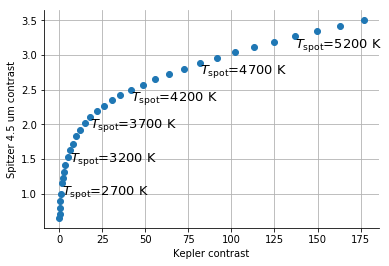

In [15]:

trappist1_flux = model_fluxes[np.argmin(np.abs(temperatures-2600)), :]

temperature_offsets = np.arange(-400, 3000, 100)

kepler_contrast = []
spitzer_contrast = []

for temp_offset in temperature_offsets:
    spot_flux = model_fluxes[np.argmin(np.abs(temperatures - (2600 + temp_offset))), :]
    
    kplr_trans_interp = np.interp(wavelengths, kplr_wavelength/1000, kplr_trans, left=0, right=0)
    photosphere_flux_kepler = np.trapz(trappist1_flux * wavelengths * kplr_trans_interp, wavelengths)
    spot_flux_kepler = np.trapz(spot_flux * wavelengths * kplr_trans_interp, wavelengths)

    kepler_contrast.append(spot_flux_kepler/photosphere_flux_kepler)
    
    spitzer_trans_interp = np.interp(wavelengths, spitz2_wave/1000, spitz2_trans, left=0, right=0)
    photosphere_flux_spitzer = np.trapz(trappist1_flux * wavelengths * spitzer_trans_interp, wavelengths)
    spot_flux_spitzer = np.trapz(spot_flux * wavelengths * spitzer_trans_interp, wavelengths)

    spitzer_contrast.append(spot_flux_spitzer / photosphere_flux_spitzer)

#     plt.figure()
#     plt.plot(wavelengths, trappist1_flux*wavelengths/np.max(trappist1_flux*wavelengths))
#     plt.plot(wavelengths, brightspot_flux*wavelengths/np.max(brightspot_flux*wavelengths))
#     plt.plot(wavelengths, kplr_trans_interp)
#     plt.plot(wavelengths, spitzer_trans_interp)
#     plt.show()
    
temperatures_tested = 2600 + temperature_offsets

fig, ax = plt.subplots()
ax.plot(kepler_contrast, spitzer_contrast, 'o', label='PHOENIX')

np.savetxt('kepler_to_spitzer_contrast.txt', np.vstack([kepler_contrast, spitzer_contrast]).T)

skip = 5
for k, s, t in zip(kepler_contrast[skip::skip], spitzer_contrast[skip::skip], temperatures_tested[skip::skip]):
    plt.annotate("$T_{{\mathrm{{spot}}}}$={0} K".format(t), 
                 xy=(k, s), xytext=(k, s), fontsize=13, va='top')

#plt.plot(kepler_contrast_simple, spitzer_contrast_simple, label='BB-scaling')
ax.set_xlabel('Kepler contrast')
ax.set_ylabel('Spitzer 4.5 um contrast')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.legend()
#plt.xlim([-1, 25])
#plt.ylim([0.5, 2.5])
ax.grid()
# ax.set_xscale('log')
plt.savefig('kepler_spitzer_contrasts.pdf')

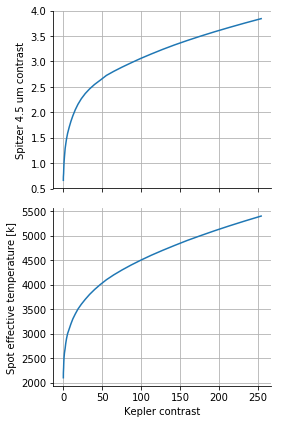

In [16]:

trappist1_flux = model_fluxes[np.argmin(np.abs(temperatures-2500)), :]

temperature_offsets = np.arange(-400, 3000, 100)

kepler_contrast = []
spitzer_contrast = []

for temp_offset in temperature_offsets:
    spot_flux = model_fluxes[np.argmin(np.abs(temperatures - (2500 + temp_offset))), :]
    
    kplr_trans_interp = np.interp(wavelengths, kplr_wavelength/1000, kplr_trans, left=0, right=0)
    photosphere_flux_kepler = np.trapz(trappist1_flux * wavelengths * kplr_trans_interp, wavelengths)
    spot_flux_kepler = np.trapz(spot_flux * wavelengths * kplr_trans_interp, wavelengths)

    kepler_contrast.append(spot_flux_kepler/photosphere_flux_kepler)
    
    spitzer_trans_interp = np.interp(wavelengths, spitz2_wave/1000, spitz2_trans, left=0, right=0)
    photosphere_flux_spitzer = np.trapz(trappist1_flux * wavelengths * spitzer_trans_interp, wavelengths)
    spot_flux_spitzer = np.trapz(spot_flux * wavelengths * spitzer_trans_interp, wavelengths)

    spitzer_contrast.append(spot_flux_spitzer / photosphere_flux_spitzer)
    
temperatures_tested = 2500 + temperature_offsets

fig, ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)
ax[0].plot(kepler_contrast, spitzer_contrast)
ax[1].plot(kepler_contrast, temperatures_tested)

np.savetxt('kepler_to_spitzer_contrast.txt', np.vstack([kepler_contrast, spitzer_contrast]).T)

skip = 5
# for k, s, t in zip(kepler_contrast[skip::skip], spitzer_contrast[skip::skip], temperatures_tested[skip::skip]):
#     plt.annotate("$T_{{\mathrm{{spot}}}}$={0} K".format(t), 
#                  xy=(k, s), xytext=(k, s), fontsize=13, va='top')

#plt.plot(kepler_contrast_simple, spitzer_contrast_simple, label='BB-scaling')
ax[1].set_xlabel('Kepler contrast')
ax[0].set_ylabel('Spitzer 4.5 um contrast')
ax[1].set_ylabel('Spot effective temperature [k]')

for axis in ax:
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.grid()

#plt.legend()
#plt.xlim([-1, 25])
#plt.ylim([0.5, 2.5])
# ax.set_xscale('log')
fig.tight_layout()
plt.savefig('kepler_spitzer_contrasts.pdf')

In [21]:
kepler_contrast_grid, spitzer_contrast_grid = np.loadtxt('kepler_to_spitzer_contrast.txt', unpack=True)
samples = np.loadtxt('posteriors_bright_spot.txt')

def kepler_to_spitzer_contrast_interp(contrast):
    return np.interp(contrast, kepler_contrast_grid, spitzer_contrast_grid)

kepler_contrast_posterior = np.median(samples[:, -2]), np.std(samples[:, -2])
spitz_contrast_p = kepler_to_spitzer_contrast_interp(np.median(samples[:, -2]))
plus_minus = kepler_to_spitzer_contrast_interp(np.median(samples[:, -2]) + np.std(samples[:, -2]))

print(plus_minus, np.median(samples[:, -2]) )
spitz_contrast_posterior = [spitz_contrast_p, plus_minus - spitz_contrast_p]

3.8399315852788356 228.274734408


In [22]:
observed_contrasts = np.vstack([kepler_contrast_posterior, spitz_contrast_posterior]).T

In [23]:
trappist1_flux = model_fluxes[np.argmin(np.abs(temperatures-2500)), :]

temperature_offsets = np.arange(-400, 4500, 100)

kepler_contrast = []
spitzer_contrast = []

for temp_offset in temperature_offsets:
    spot_flux = model_fluxes[np.argmin(np.abs(temperatures - (2500 + temp_offset))), :]
    
    kplr_trans_interp = np.interp(wavelengths, kplr_wavelength/1000, kplr_trans, left=0, right=0)
    photosphere_flux_kepler = np.trapz(trappist1_flux * wavelengths * kplr_trans_interp, wavelengths)
    spot_flux_kepler = np.trapz(spot_flux * wavelengths * kplr_trans_interp, wavelengths)

    kepler_contrast.append(spot_flux_kepler/photosphere_flux_kepler)
    
    spitzer_trans_interp = np.interp(wavelengths, spitz2_wave/1000, spitz2_trans, left=0, right=0)
    photosphere_flux_spitzer = np.trapz(trappist1_flux * wavelengths * spitzer_trans_interp, wavelengths)
    spot_flux_spitzer = np.trapz(spot_flux * wavelengths * spitzer_trans_interp, wavelengths)

    spitzer_contrast.append(spot_flux_spitzer / photosphere_flux_spitzer)
    
temperatures_tested = 2500 + temperature_offsets
kepler_contrast = np.array(kepler_contrast)

In [24]:
kepler_contrast.min(), kepler_contrast.max()

(0.16488858604194154, 691.53531795215349)

In [25]:
np.savetxt('contrast_to_temperature.txt', np.vstack([kepler_contrast, temperatures_tested]).T)

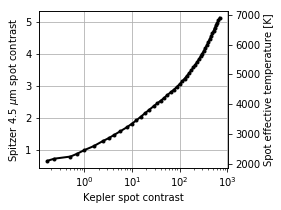

In [26]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(kepler_contrast, spitzer_contrast, 'k.-', lw=2, label='Contrasts')

ax2 = ax.twinx()

ax2.plot(kepler_contrast, temperatures_tested, lw=0, label='Temperature')
# ax2.legend(loc='lower right')
# ax.errorbar(observed_contrasts[0, 0], observed_contrasts[0, 1], 
#             xerr=[observed_contrasts[1, 0]], yerr=[observed_contrasts[1, 1]], 
#             color = 'r', zorder=100, lw=3)
#ax.legend()
ax.grid()
ax.set_xlabel('Kepler spot contrast')
ax.set_ylabel('Spitzer 4.5 $\mu$m spot contrast')
ax2.set_ylabel('Spot effective temperature [K]')

ax.set_xscale('log')
fig.tight_layout()
plt.savefig('kepler_spitzer_contrasts.pdf')


# interp_contrast_to_temp = lambda x: np.interp(x, kepler_contrast, temperatures_tested)
# fig, ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

# ax[0].hist(samples[:, -2])
# ax[0].set(yticks=[])

# ax[1].plot(kepler_contrast, spitzer_contrast, 'k.-', lw=2, label='Contrasts')

# ax2 = ax[1].twinx()

# ax2.plot(kepler_contrast, temperatures_tested, lw=0, label='Temperature')
# #ax2.legend(loc='lower right')
# # ax[1].errorbar(observed_contrasts[0, 0], observed_contrasts[0, 1], 
# #             xerr=[observed_contrasts[1, 0]], yerr=[observed_contrasts[1, 1]], 
# #             color = 'r', zorder=100, lw=3)
# #ax.legend()
# ax[1].grid()
# ax[1].set_xlabel('Kepler spot contrast')
# ax[1].set_ylabel('Spitzer 4.5 $\mu$m spot contrast')
# ax2.set_ylabel('Spot effective temperature [K]')

# ax[0].set_xscale('log')
# fig.tight_layout()
# plt.savefig('kepler_spitzer_contrasts.pdf')

In [27]:
# #samples = np.loadtxt('posteriors_bright_spot.txt')

# fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].hist(contrasts)
# ax[0].set(xlabel='Kepler contrast')

# temperatures_inferred = np.interp(contrasts, kepler_contrast, temperatures_tested)
# ax[1].hist(temperatures_inferred)

# # print(np.median(temperatures_inferred), np.std(temperatures_inferred))

# #temperature_samples = np.interp(samples[:, -2], kepler_contrast, temperatures_tested)
# #plt.scatter(samples[:, -2], temperature_samples, s=0.5, alpha=0.01)

# fig.savefig('bright_spot_posteriors_temp.pdf')

In [28]:
# from scipy.interpolate import RectBivariateSpline

# spline_order = 1
# rbs = RectBivariateSpline(wavelengths,
#                           temperatures,
#                           model_fluxes.T,
#                           kx=spline_order,
#                           ky=spline_order)

# def get_spectrum(teff):
#     return rbs.ev(wavelengths, teff)
# consider_wavelengths = wavelengths[(wavelengths > 0.2) & (wavelengths < 6)]
# temperature_offsets = np.linspace(-500, 2000, 3)
# kepler_contrast = []
# spitzer_contrast = []

# trappist1_flux = get_spectrum(2559)

# for temp_offset in temperature_offsets:
#     print(temp_offset)
#     kplr_trans_interp = np.interp(consider_wavelengths, kplr_wavelength/1000, kplr_trans, left=0, right=0)
#     photosphere_flux_kepler = np.trapz(trappist1_flux_bb * wavelengths * kplr_trans_interp, consider_wavelengths)

#     brightspot_flux = get_spectrum(2559 + temp_offset)
#     brightspot_flux_kepler = np.trapz(brightspot_flux * consider_wavelengths * kplr_trans_interp, consider_wavelengths)

#     kepler_contrast.append(brightspot_flux_kepler/photosphere_flux_kepler)

#     spitzer_trans_interp = np.interp(phoenix_wavelength, spitz2_wave/1000, spitz2_trans, left=0, right=0)
#     photosphere_flux_spitzer = np.trapz(trappist1_flux * consider_wavelengths * spitzer_trans_interp, consider_wavelengths)
#     brightspot_flux_spitzer = np.trapz(brightspot_flux * consider_wavelengths * spitzer_trans_interp, consider_wavelengths)

#     spitzer_contrast.append(brightspot_flux_spitzer / photosphere_flux_spitzer)
    
# plt.plot(kepler_contrast, spitzer_contrast)

In [152]:
# Sanity check with blackbodies: 

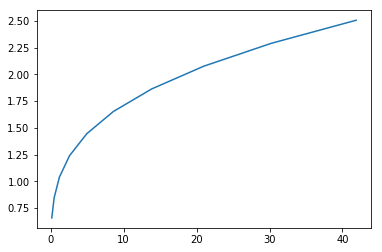

In [165]:
temperature_offsets = np.linspace(-500, 2000, 10)

bb_wavelengths = np.linspace(0.1, 6, 1000)*u.um

trappist1_flux_bb = blackbody_lambda(bb_wavelengths, 2511).value
kepler_contrast_bb = []
spitzer_contrast_bb = []
for temp_offset in temperature_offsets:
    kplr_trans_interp = np.interp(bb_wavelengths, kplr_wavelength/1000, kplr_trans, left=0, right=0)
    photosphere_flux_kepler = np.trapz(trappist1_flux_bb * bb_wavelengths * kplr_trans_interp, bb_wavelengths)
    brightspot_flux = blackbody_lambda(bb_wavelengths, 2511 + temp_offset).value
    brightspot_flux_kepler = np.trapz(brightspot_flux * bb_wavelengths * kplr_trans_interp, bb_wavelengths)
    
    kepler_contrast_bb.append(brightspot_flux_kepler/photosphere_flux_kepler)

    spitzer_trans_interp = np.interp(bb_wavelengths, spitz2_wave/1000, spitz2_trans, left=0, right=0)
    photosphere_flux_spitzer = np.trapz(trappist1_flux_bb * bb_wavelengths * spitzer_trans_interp, bb_wavelengths)
    brightspot_flux_spitzer = np.trapz(brightspot_flux * bb_wavelengths * spitzer_trans_interp, bb_wavelengths)

    spitzer_contrast_bb.append(brightspot_flux_spitzer / photosphere_flux_spitzer)

plt.plot(kepler_contrast_bb, spitzer_contrast_bb)

How does the spitzer variability amplitude compare to the kepler contrast? 

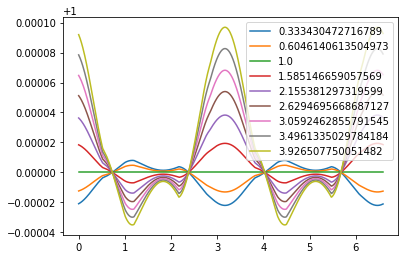

In [30]:
trappist1_flux = model_fluxes[np.argmin(np.abs(temperatures-2500)), :]

temperature_offsets = np.arange(-1000, 3500, 500)

kepler_contrast = []
spitzer_contrast = []

# initp = np.array([0, 330, 0.02, 
#                   0,  50, 0.008, 
#                   0, 210, 0.008, 0])

samples = np.loadtxt('posteriors_bright_spot.txt')
spot_params = np.median(samples, axis=0)

times = np.arange(0, 2*3.3, 0.01)

std_fluxes_spitzer = []

for temp_offset in temperature_offsets:
    spot_flux = model_fluxes[np.argmin(np.abs(temperatures - (2500 + temp_offset))), :]
    
    kplr_trans_interp = np.interp(wavelengths, kplr_wavelength/1000, kplr_trans, left=0, right=0)
    photosphere_flux_kepler = np.trapz(trappist1_flux * wavelengths * kplr_trans_interp, wavelengths)
    spot_flux_kepler = np.trapz(spot_flux * wavelengths * kplr_trans_interp, wavelengths)

    kepler_contrast.append(spot_flux_kepler/photosphere_flux_kepler)
    
    spitzer_trans_interp = np.interp(wavelengths, spitz2_wave/1000, spitz2_trans, left=0, right=0)
    photosphere_flux_spitzer = np.trapz(trappist1_flux * wavelengths * spitzer_trans_interp, wavelengths)
    spot_flux_spitzer = np.trapz(spot_flux * wavelengths * spitzer_trans_interp, wavelengths)

    spitzer_contrast.append(spot_flux_spitzer / photosphere_flux_spitzer)
    
    spitz_contrast = spot_flux_spitzer / photosphere_flux_spitzer
    
    lat0, lon0, rad0, lat1, lon1, rad1, lat2, lon2, rad2, kep_contrast, kep_offset  = spot_params
    spots = [Spot.from_latlon(lat0, lon0, rad0, spitz_contrast), 
             Spot.from_latlon(lat1, lon1, rad1, spitz_contrast), 
             Spot.from_latlon(lat2, lon2, rad2, spitz_contrast)]
    star = Star(spots=spots, rotation_period=3.3*u.day)
    fluxes = star.flux(times)
    fluxes /= np.median(fluxes)
    
    std_fluxes_spitzer.append(fluxes.ptp())
    plt.plot(times, fluxes, label='{0}'.format(spitz_contrast))
plt.legend()
plt.show()

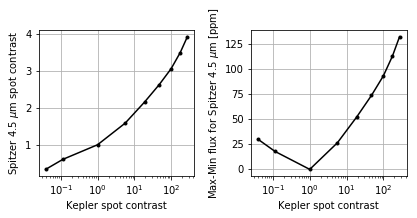

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].semilogx(kepler_contrast, spitzer_contrast, 'k.-')

ax[0].set_xlabel('Kepler spot contrast')
ax[0].set_ylabel('Spitzer 4.5 $\mu$m spot contrast')

ax[1].set_xlabel('Kepler spot contrast')
ax[1].semilogx(kepler_contrast, np.array(std_fluxes_spitzer) * 1e6, 'k.-')
ax[1].set_ylabel('Max-Min flux for Spitzer 4.5 $\mu$m [ppm]')
for axis in ax:
    axis.grid()

fig.tight_layout()
fig.savefig('amplitude.png', dpi=250)